## Principal Component Analysis of Glass

Installing Pycaret and Shap

In [ ]:
!pip install pycaret

In [92]:
!pip install shap

Import Libraries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import shap
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pycaret.utils import version
from pycaret.classification import *

In [94]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)
print("Pycaret version: ", version())
print()

Pandas version:  1.5.3
Seaborn version:  0.12.2
Pycaret version:  3.2.0



# Dataset:


This dataset  is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

Attribute Information:

* Id number: 1 to 214 (removed from CSV file)
* RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are * attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
* Type of glass: (class attribute)

  1.   building_windows_float_processed
  2.   building_windows_non_float_processed
  1.   vehicle_windows_float_processed
  2.   vehicle_windows_non_float_processed (none in this database)
  1.   containers
  2.   tableware
  3.   headlamps

In [95]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [96]:
df = pd.read_csv('/content/drive/MyDrive/glass.csv', engine="python")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Dataset Cleanup

In [98]:
df = df.drop_duplicates()

print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [99]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Data Analysis

Pair Plot

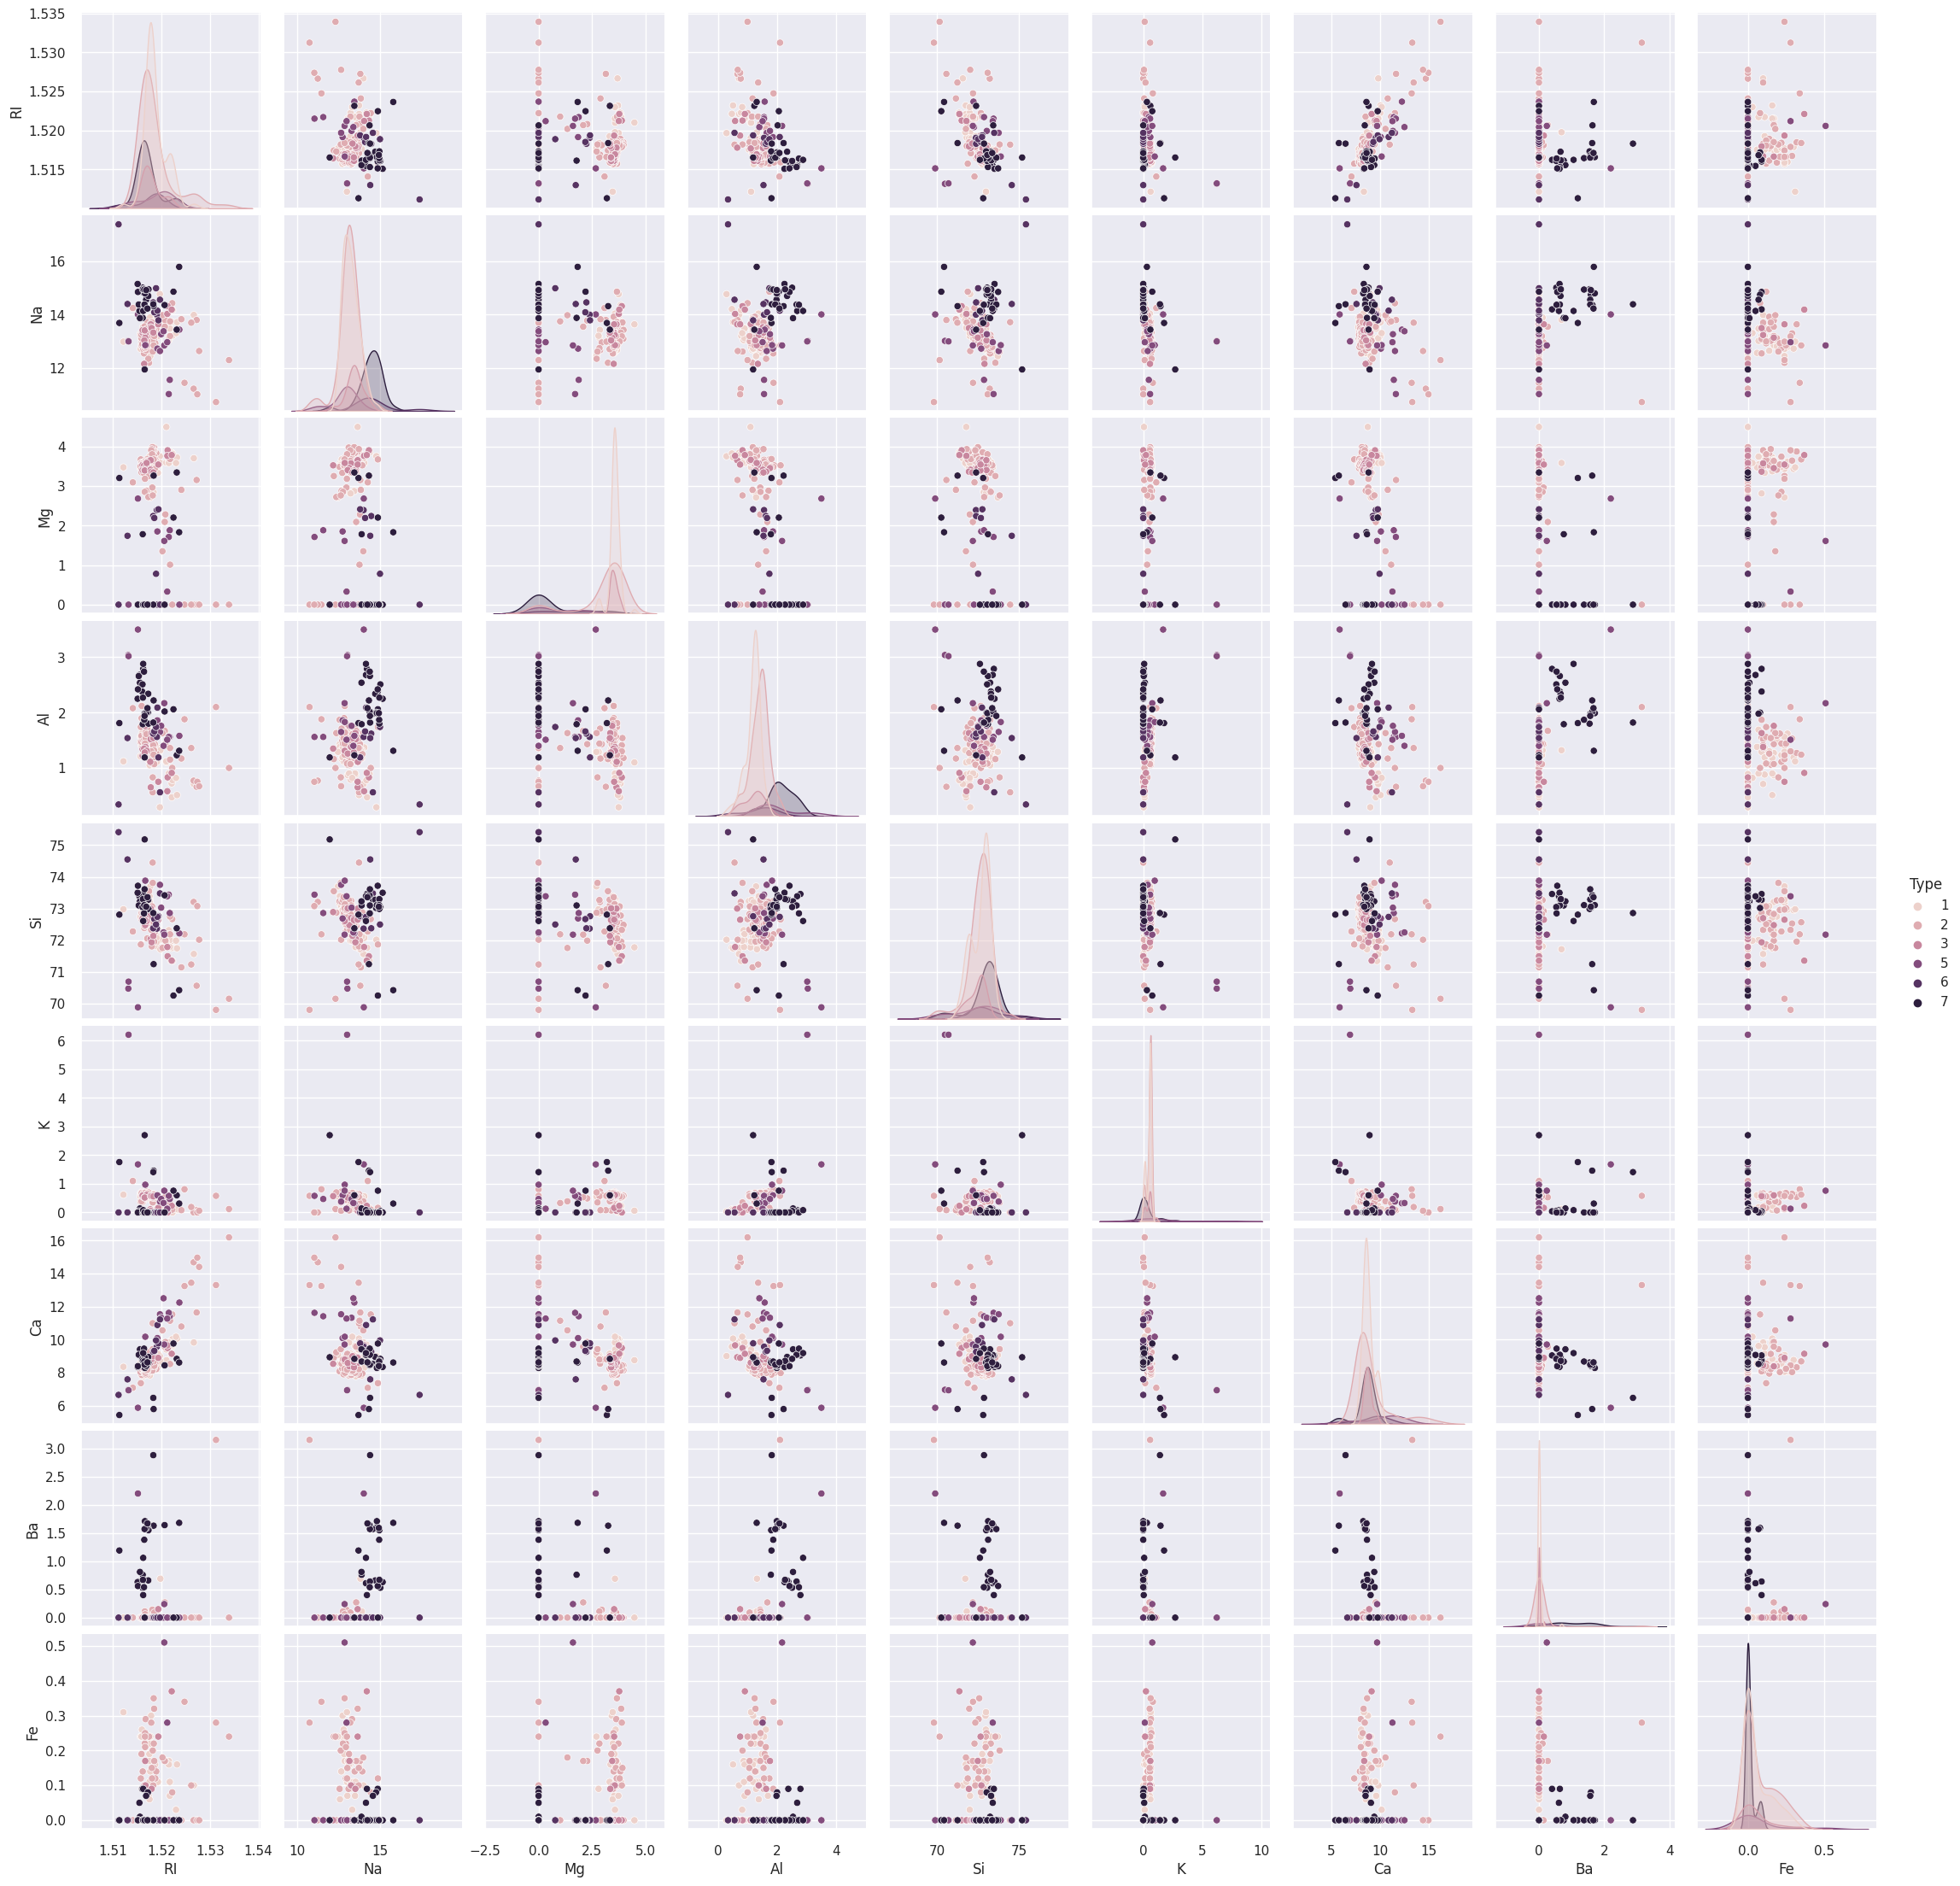

In [100]:
sns.pairplot(df, hue='Type')
plt.show()

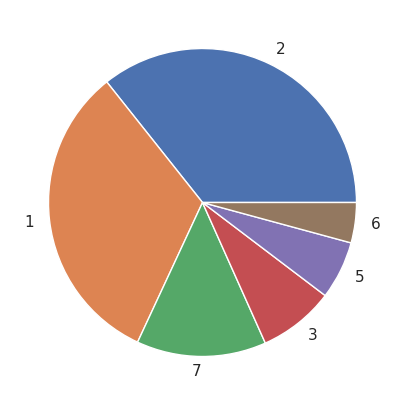

In [101]:
y =df['Type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [102]:
X = df.drop(columns=['Type'])
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


Standardize the Data

In [103]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518348,0.003033,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.404085,0.816662,10.73000,12.90000,13.30000,13.81000,17.38000
Mg,213.0,2.679202,1.443691,0.00000,2.09000,3.48000,3.60000,4.49000
Al,213.0,1.449484,0.495925,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655070,0.773998,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.498873,0.653185,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.954085,1.425882,5.43000,8.24000,8.60000,9.15000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000


In [105]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,213.0,-1.204670e-14,1.002356,-2.378762,-0.604046,-0.220682,0.265134,5.149732
Na,213.0,-3.402599e-15,1.002356,-3.282120,-0.618704,-0.127751,0.498213,4.879962
Mg,213.0,2.668705e-16,1.002356,-1.860172,-0.409083,0.555995,0.639311,1.257238
Al,213.0,-1.667941e-16,1.002356,-2.343529,-0.524464,-0.180863,0.364857,4.144470
Si,213.0,1.003266e-14,1.002356,-3.684469,-0.485730,0.174739,0.563250,3.567734
K,213.0,7.297241e-17,1.002356,-0.765554,-0.566060,0.093803,0.170531,8.764103
Ca,213.0,-1.200917e-15,1.002356,-2.477335,-0.501982,-0.248912,0.137723,5.086650
Ba,213.0,-3.335881e-17,1.002356,-0.353808,-0.353808,-0.353808,-0.353808,5.983278
Fe,213.0,-1.876433e-17,1.002356,-0.588301,-0.588301,-0.588301,0.438815,4.649990


Observations and Variables

In [106]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

[Text(0, 0, 'RI'),
 Text(1, 0, 'Na'),
 Text(2, 0, 'Mg'),
 Text(3, 0, 'Al'),
 Text(4, 0, 'Si'),
 Text(5, 0, 'K'),
 Text(6, 0, 'Ca'),
 Text(7, 0, 'Ba'),
 Text(8, 0, 'Fe')]

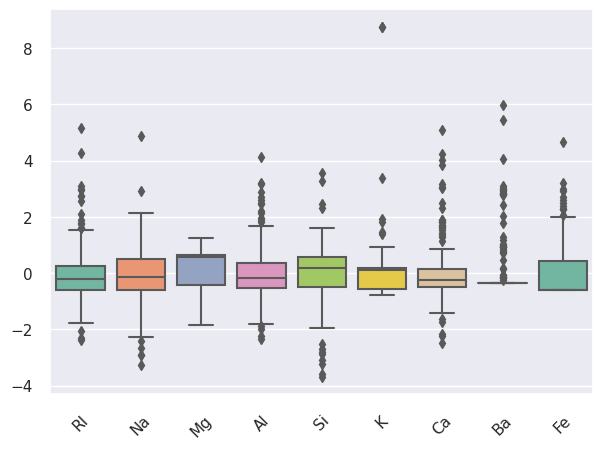

In [107]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

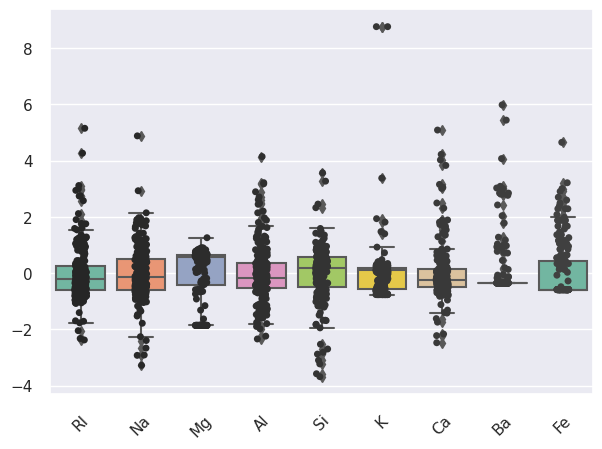

In [108]:
# Using swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

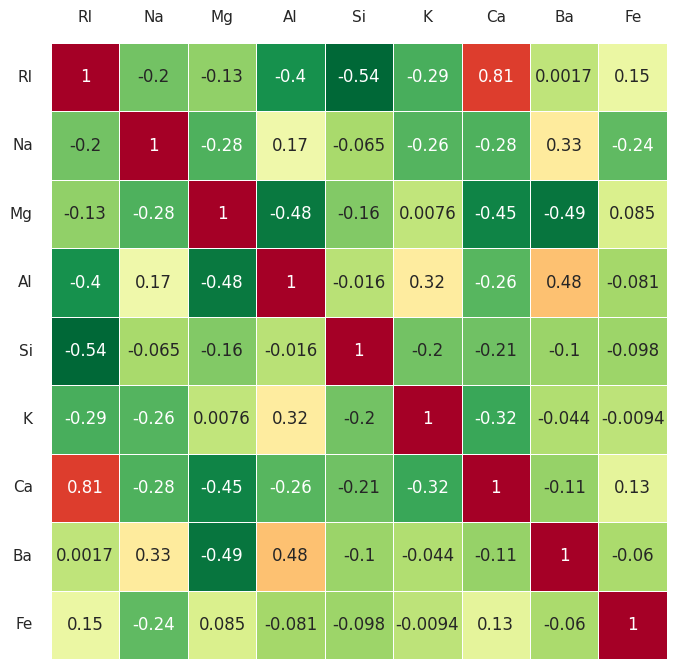

In [109]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=0, fontsize=10);
# ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=10);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## Principal Component Analysis

Using PCA Library

In [ ]:
!pip install pca

In [111]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [112]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.144362,-0.523235,-0.318233,1.763545,-0.286825,0.329639
1,-0.573033,-0.762109,-0.526898,0.778737,-0.271903,-0.119602
2,-0.933557,-0.933773,-0.541401,0.224349,-0.243989,0.123182
3,-0.133443,-0.962252,-0.101325,0.422093,-0.485346,0.281832
4,-0.340005,-1.095030,-0.480389,0.085565,-0.436446,0.295874
...,...,...,...,...,...,...
208,-2.389960,3.056073,0.081664,-0.391639,0.110557,0.230030
209,-2.409179,3.090542,-1.110068,0.311494,0.618539,0.622384
210,-1.684782,3.270929,-0.943224,-0.148878,0.450871,1.251928
211,-2.371376,2.736765,-1.255252,-0.498340,0.520625,1.009399


Scatter Plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [99.26%] of the variance'}, xlabel='PC1 (27.8% expl.var)', ylabel='PC2 (22.8% expl.var)'>)

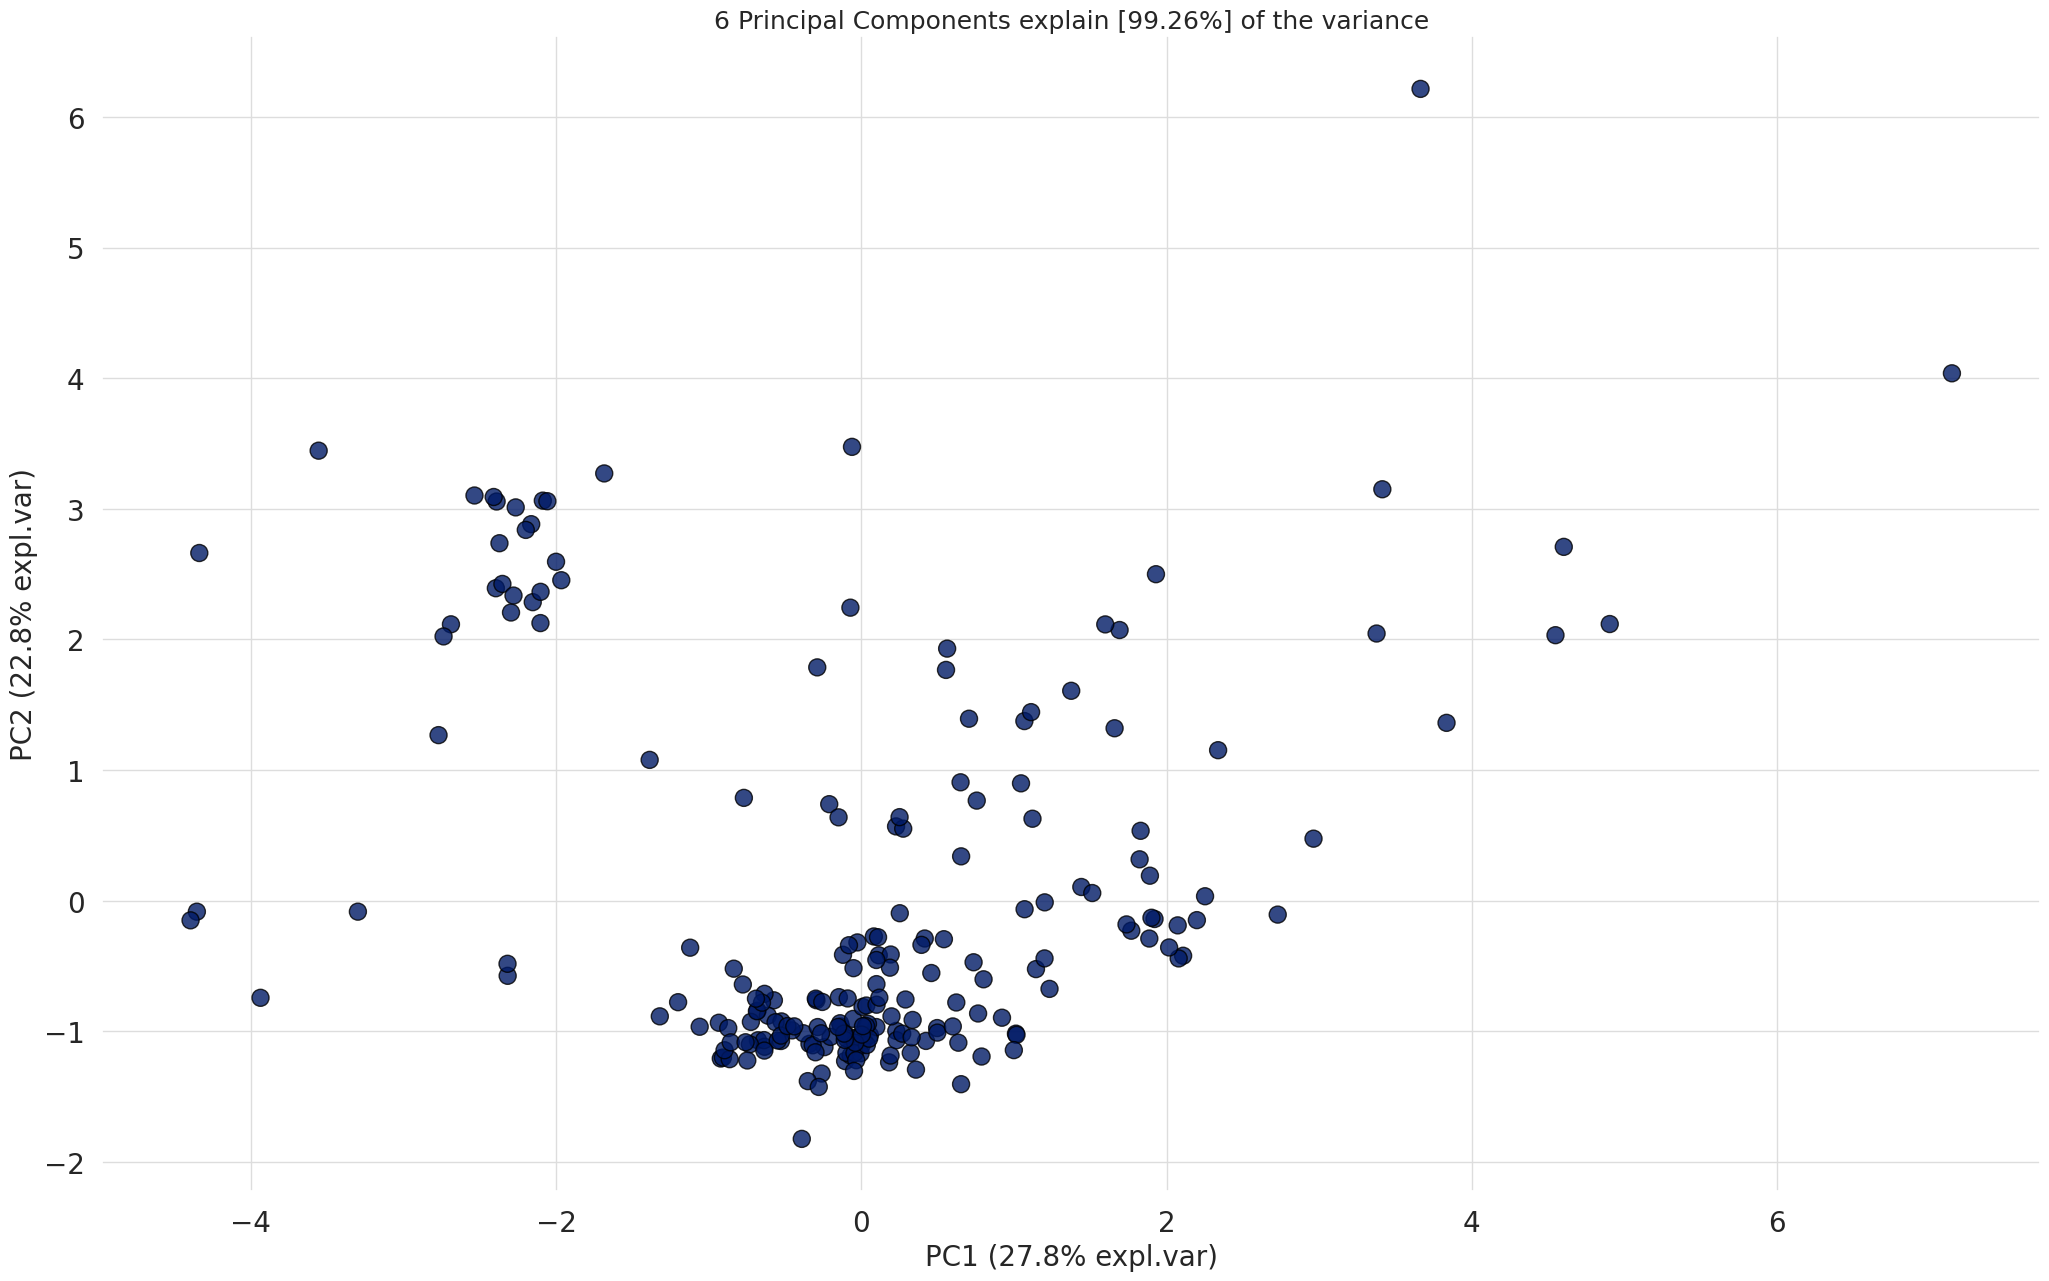

In [113]:
model.scatter(label=True, legend=False)

Eigenvectors

In [114]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5,PC6
RI,0.543223,0.289118,0.088495,0.147980,-0.076708,0.114556
Na,-0.267614,0.269099,-0.367101,0.501067,0.146268,-0.557906
Mg,0.109326,-0.592155,0.022953,0.384244,0.116100,0.305853
Al,-0.426951,0.296363,0.326029,-0.148876,0.017201,-0.020141
Si,-0.223923,-0.158745,-0.479799,-0.639496,0.017637,0.088508
K,-0.215659,-0.153051,0.663492,-0.073349,-0.301546,-0.241076
Ca,0.492437,0.346790,-0.013802,-0.274343,-0.184314,-0.149579
Ba,-0.251646,0.482621,0.076490,0.129943,0.249709,0.659864
Fe,0.191264,-0.060892,0.272238,-0.225260,0.878282,-0.240666


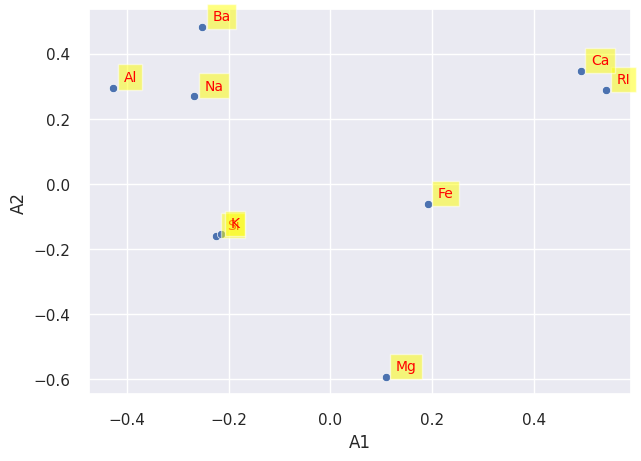

In [115]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

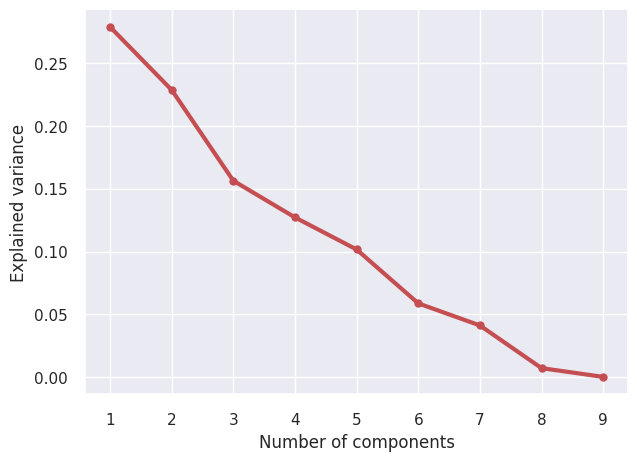

In [116]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

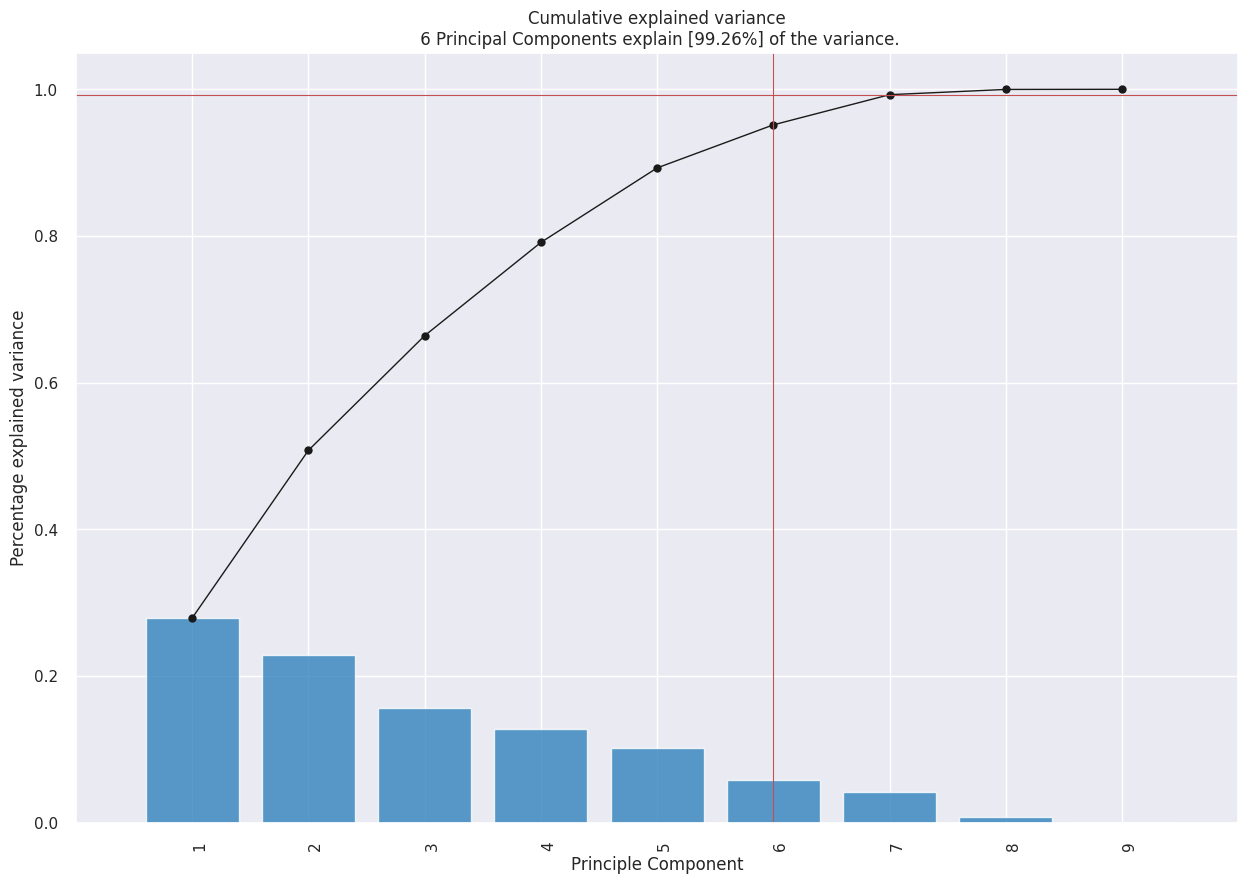

In [117]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '6 Principal Components explain [99.26%] of the variance'}, xlabel='PC1 (27.8% expl.var)', ylabel='PC2 (22.8% expl.var)'>)

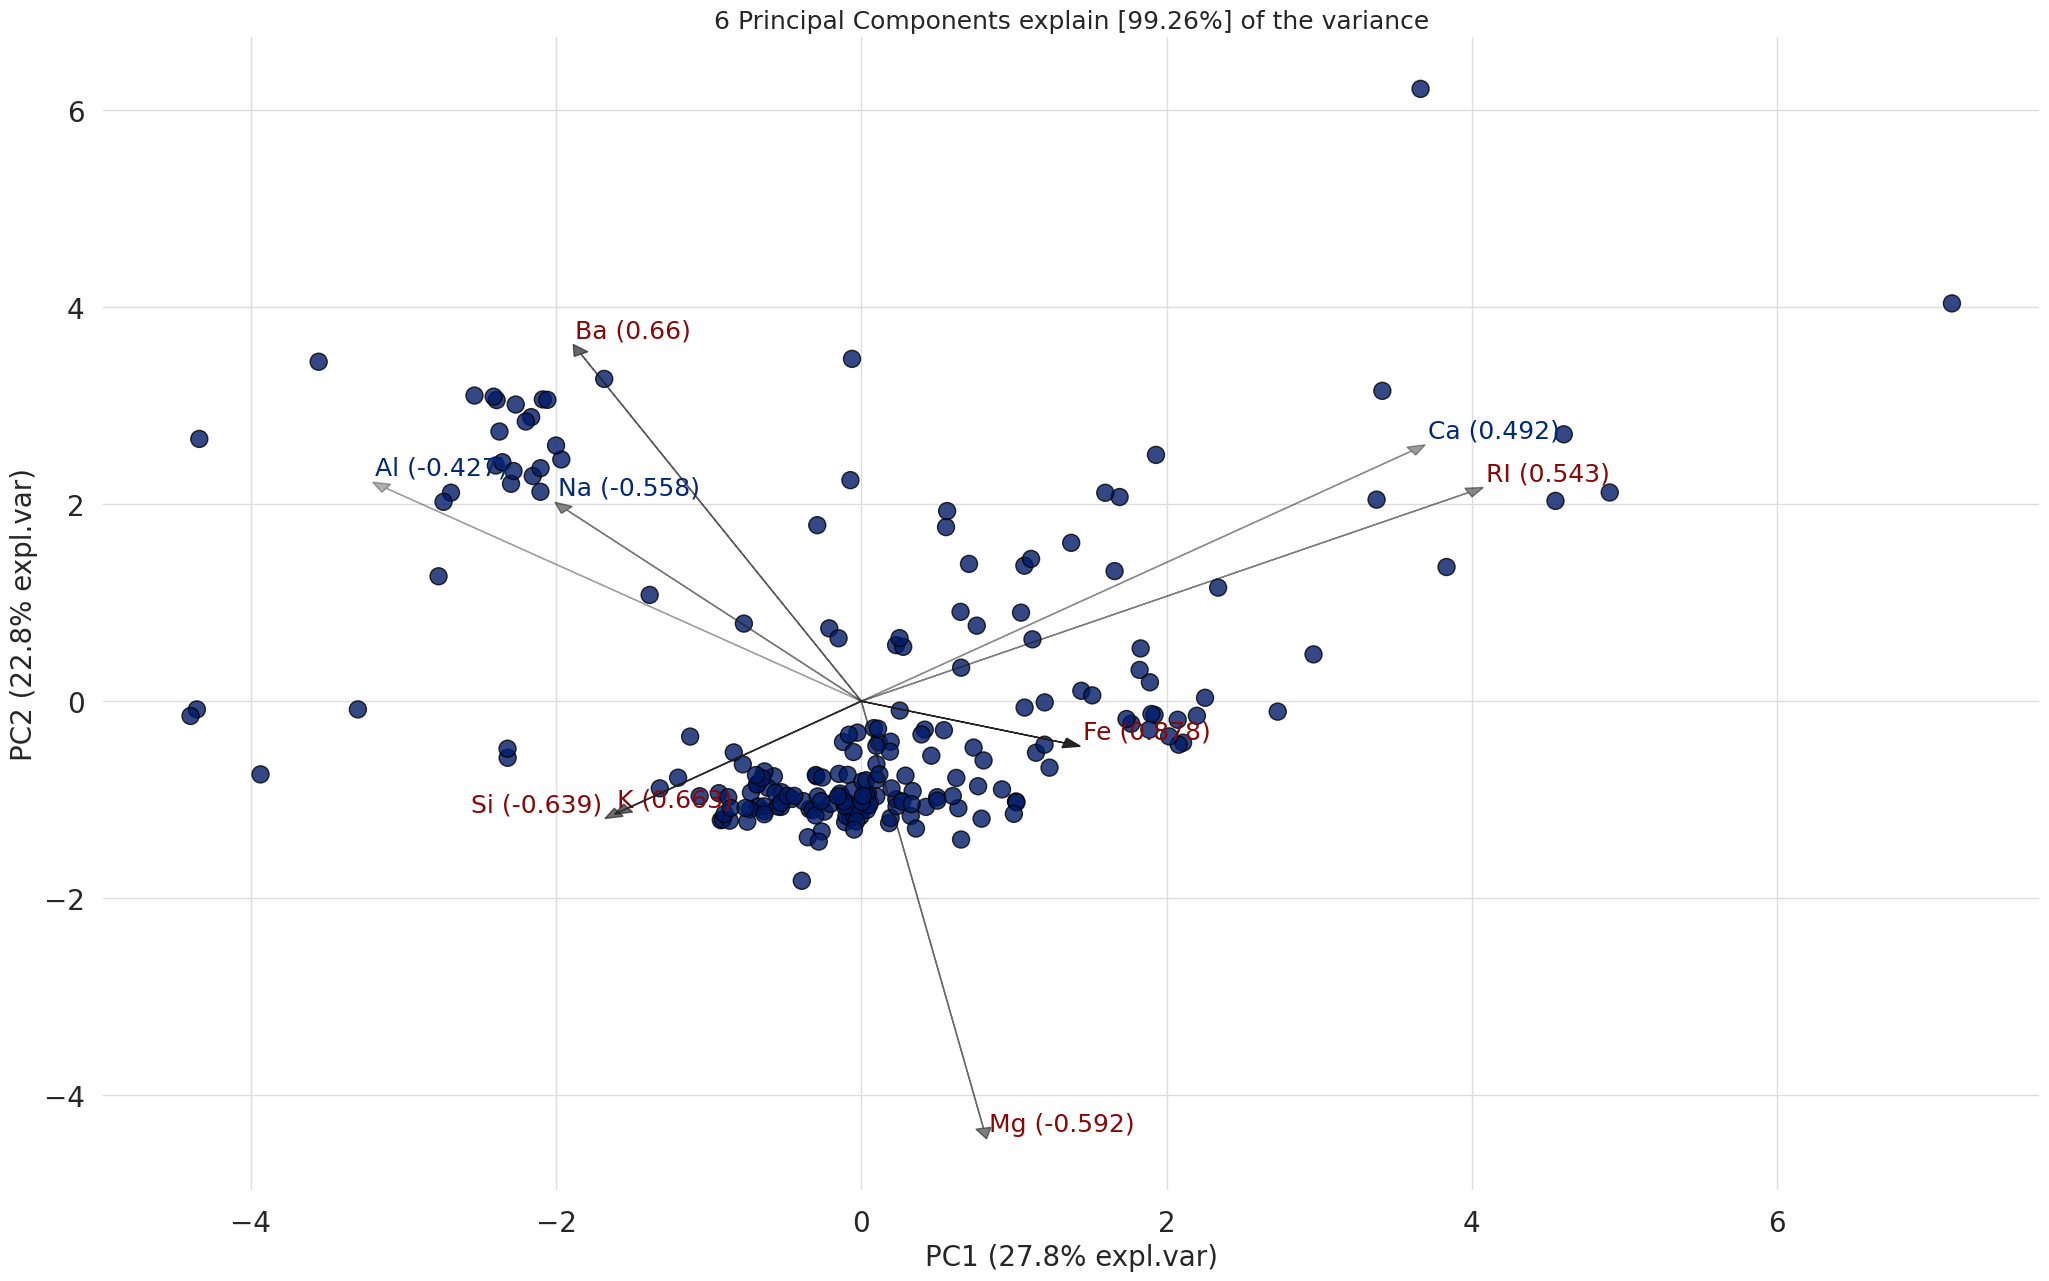

In [118]:
model.biplot(label=False, legend=True, color_arrow='k')

#Classification using Pycaret


In [119]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (192, 10)
Unseen Data For Predictions: (21, 10)


In [120]:
clf = setup(data=data, target='Type', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(192, 10)"
5,Transformed data shape,"(192, 10)"
6,Transformed train set shape,"(134, 10)"
7,Transformed test set shape,"(58, 10)"
8,Numeric features,9
9,Preprocess,True


Comparing all models

In [121]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8214,0.4746,0.8214,0.8163,0.8070,0.7516,0.7626,0.1690
rf,Random Forest Classifier,0.7824,0.4610,0.7824,0.7662,0.7618,0.6967,0.7090,0.2120
gbc,Gradient Boosting Classifier,0.7451,0.4491,0.7451,0.7096,0.7163,0.6455,0.6575,0.7680
xgboost,Extreme Gradient Boosting,0.7451,0.4458,0.7451,0.7224,0.7230,0.6469,0.6576,0.1840
lightgbm,Light Gradient Boosting Machine,0.7077,0.4423,0.7077,0.6618,0.6741,0.5873,0.5996,0.6360
dt,Decision Tree Classifier,0.6720,0.3840,0.6720,0.6578,0.6500,0.5420,0.5538,0.0300
knn,K Neighbors Classifier,0.6407,0.4418,0.6407,0.6375,0.6129,0.4986,0.5152,0.0460
ridge,Ridge Classifier,0.6401,0.0000,0.6401,0.5743,0.5890,0.4808,0.5014,0.0290
lda,Linear Discriminant Analysis,0.6352,0.4324,0.6352,0.6358,0.6093,0.4919,0.5077,0.0410
lr,Logistic Regression,0.6110,0.4099,0.6110,0.5742,0.5738,0.4484,0.4659,1.4940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [122]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Tuned best model



In [123]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.0000,0.7857,0.7551,0.7500,0.6842,0.7021
1,0.7143,0.0000,0.7143,0.6190,0.6623,0.5758,0.5864
2,0.8571,0.0000,0.8571,0.8265,0.8214,0.7895,0.8101
3,0.7143,0.0000,0.7143,0.6238,0.6645,0.6028,0.6170
4,0.6923,0.8547,0.6923,0.6654,0.6667,0.5840,0.5935
5,0.5385,0.8141,0.5385,0.4692,0.4957,0.3554,0.3617
6,0.6923,0.9690,0.6923,0.5897,0.6308,0.5593,0.5757
7,0.8462,0.9818,0.8462,0.8205,0.8188,0.7869,0.8074
8,0.7692,0.8932,0.7692,0.7051,0.7162,0.6803,0.7043


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Classification + PCA

In [126]:
from pycaret.classification import *

clf_pca = setup(data=df, target='Type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 6)

results = pull()

print(results)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(213, 10)"
5,Transformed data shape,"(213, 7)"
6,Transformed train set shape,"(149, 7)"
7,Transformed test set shape,"(64, 7)"
8,Numeric features,9
9,Preprocess,True


                    Description                               Value
0                    Session id                                 123
1                        Target                                Type
2                   Target type                          Multiclass
3                Target mapping  1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5
4           Original data shape                           (213, 10)
5        Transformed data shape                            (213, 7)
6   Transformed train set shape                            (149, 7)
7    Transformed test set shape                             (64, 7)
8              Numeric features                                   9
9                    Preprocess                                True
10              Imputation type                              simple
11           Numeric imputation                                mean
12       Categorical imputation                                mode
13                    Normalize                 

Comparing All Models

In [127]:
best_model_pca = compare_models()

results = pull()

print(results)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7052,0.5415,0.7052,0.6821,0.6726,0.5858,0.6059,0.3190
rf,Random Forest Classifier,0.6848,0.5430,0.6848,0.6428,0.6475,0.5578,0.5752,0.2160
knn,K Neighbors Classifier,0.6643,0.5162,0.6643,0.6436,0.6248,0.5364,0.5667,0.0900
lightgbm,Light Gradient Boosting Machine,0.6586,0.5256,0.6586,0.6271,0.6191,0.5203,0.5418,0.8200
dt,Decision Tree Classifier,0.6510,0.4613,0.6510,0.6414,0.6274,0.5272,0.5384,0.0710
xgboost,Extreme Gradient Boosting,0.6114,0.5330,0.6114,0.6116,0.5835,0.4647,0.4824,0.1170
gbc,Gradient Boosting Classifier,0.5976,0.4986,0.5976,0.5719,0.5634,0.4367,0.4529,0.6020
lr,Logistic Regression,0.5500,0.4601,0.5500,0.5031,0.5100,0.3709,0.3849,0.0820
lda,Linear Discriminant Analysis,0.5433,0.4598,0.5433,0.4723,0.4846,0.3604,0.3847,0.0670
qda,Quadratic Discriminant Analysis,0.5162,0.4498,0.5162,0.4822,0.4590,0.3286,0.3596,0.0400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.7052  0.5415  0.7052  0.6821   
rf               Random Forest Classifier    0.6848  0.5430  0.6848  0.6428   
knn                K Neighbors Classifier    0.6643  0.5162  0.6643  0.6436   
lightgbm  Light Gradient Boosting Machine    0.6586  0.5256  0.6586  0.6271   
dt               Decision Tree Classifier    0.6510  0.4613  0.6510  0.6414   
xgboost         Extreme Gradient Boosting    0.6114  0.5330  0.6114  0.6116   
gbc          Gradient Boosting Classifier    0.5976  0.4986  0.5976  0.5719   
lr                    Logistic Regression    0.5500  0.4601  0.5500  0.5031   
lda          Linear Discriminant Analysis    0.5433  0.4598  0.5433  0.4723   
qda       Quadratic Discriminant Analysis    0.5162  0.4498  0.5162  0.4822   
ridge                    Ridge Classifier    0.4833  0.0000  0.4833  0.4041   
nb                            Naive Bayes    0.4633 

Best model with PCA

In [ ]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
tuned_best_model_pca = tune_model(best_model_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4667,0.0000,0.4667,0.4381,0.4320,0.2157,0.2296
1,0.6667,0.0000,0.6667,0.5300,0.5894,0.5098,0.5301
2,0.8000,0.0000,0.8000,0.7417,0.7534,0.7020,0.7340
3,0.7333,0.9038,0.7333,0.6571,0.6889,0.6250,0.6385
4,0.7333,0.9590,0.7333,0.5937,0.6511,0.6226,0.6410
5,0.4667,0.8221,0.4667,0.3817,0.4141,0.2638,0.2709
6,0.6000,0.9105,0.6000,0.4984,0.5424,0.4231,0.4366
7,0.6000,0.9031,0.6000,0.5222,0.5364,0.4118,0.4365
8,0.6000,0.8219,0.6000,0.5704,0.5571,0.4375,0.4737


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.4667  0.0000  0.4667  0.4381  0.4320  0.2157  0.2296
1       0.6667  0.0000  0.6667  0.5300  0.5894  0.5098  0.5301
2       0.8000  0.0000  0.8000  0.7417  0.7534  0.7020  0.7340
3       0.7333  0.9038  0.7333  0.6571  0.6889  0.6250  0.6385
4       0.7333  0.9590  0.7333  0.5937  0.6511  0.6226  0.6410
5       0.4667  0.8221  0.4667  0.3817  0.4141  0.2638  0.2709
6       0.6000  0.9105  0.6000  0.4984  0.5424  0.4231  0.4366
7       0.6000  0.9031  0.6000  0.5222  0.5364  0.4118  0.4365
8       0.6000  0.8219  0.6000  0.5704  0.5571  0.4375  0.4737
9       0.5000  0.0000  0.5000  0.3052  0.3661  0.2576  0.3435
Mean    0.6167  0.5320  0.6167  0.5239  0.5531  0.4469  0.4734
Std     0.1108  0.4361  0.1108  

In [ ]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Evaluate Best Model

In [ ]:
evaluate_model(tuned_best_model_pca)

results = pull()

print(results)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.4667  0.0000  0.4667  0.4381  0.4320  0.2157  0.2296
1       0.6667  0.0000  0.6667  0.5300  0.5894  0.5098  0.5301
2       0.8000  0.0000  0.8000  0.7417  0.7534  0.7020  0.7340
3       0.7333  0.9038  0.7333  0.6571  0.6889  0.6250  0.6385
4       0.7333  0.9590  0.7333  0.5937  0.6511  0.6226  0.6410
5       0.4667  0.8221  0.4667  0.3817  0.4141  0.2638  0.2709
6       0.6000  0.9105  0.6000  0.4984  0.5424  0.4231  0.4366
7       0.6000  0.9031  0.6000  0.5222  0.5364  0.4118  0.4365
8       0.6000  0.8219  0.6000  0.5704  0.5571  0.4375  0.4737
9       0.5000  0.0000  0.5000  0.3052  0.3661  0.2576  0.3435
Mean    0.6167  0.5320  0.6167  0.5239  0.5531  0.4469  0.4734
Std     0.1108  0.4361  0.1108  0.1218  0.1178  0.1601  0.1570


# Extra Trees Classifier Model

In [ ]:
et_pca = create_model('et')

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.5746,0.5699,0.4231,0.4387
1,0.6667,0.0000,0.6667,0.6190,0.6162,0.5253,0.5517
2,0.7333,0.0000,0.7333,0.7238,0.7192,0.6129,0.6255
3,0.7333,0.8781,0.7333,0.7889,0.7369,0.6512,0.6627
4,0.9333,0.9976,0.9333,0.9667,0.9407,0.9128,0.9183
5,0.7333,0.9031,0.7333,0.6444,0.6824,0.6319,0.6404
6,0.6667,0.8938,0.6667,0.5270,0.5844,0.5283,0.5439
7,0.6000,0.8879,0.6000,0.5000,0.5385,0.4304,0.4532
8,0.6000,0.8543,0.6000,0.6815,0.5810,0.4512,0.4932


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6000  0.0000  0.6000  0.5746  0.5699  0.4231  0.4387
1       0.6667  0.0000  0.6667  0.6190  0.6162  0.5253  0.5517
2       0.7333  0.0000  0.7333  0.7238  0.7192  0.6129  0.6255
3       0.7333  0.8781  0.7333  0.7889  0.7369  0.6512  0.6627
4       0.9333  0.9976  0.9333  0.9667  0.9407  0.9128  0.9183
5       0.7333  0.9031  0.7333  0.6444  0.6824  0.6319  0.6404
6       0.6667  0.8938  0.6667  0.5270  0.5844  0.5283  0.5439
7       0.6000  0.8879  0.6000  0.5000  0.5385  0.4304  0.4532
8       0.6000  0.8543  0.6000  0.6815  0.5810  0.4512  0.4932
9       0.7857  0.0000  0.7857  0.7946  0.7569  0.6912  0.7313
Mean    0.7052  0.5415  0.7052  0.6821  0.6726  0.5858  0.6059
Std     0.0985  0.4435  0.0985  0.1345  0.1155  0.1417  0.1374


Tuning Extra Trees Classifier Model

In [ ]:
tuned_et_pca = tune_model(et_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4667,0.0000,0.4667,0.4381,0.4320,0.2157,0.2296
1,0.6667,0.0000,0.6667,0.5300,0.5894,0.5098,0.5301
2,0.8000,0.0000,0.8000,0.7417,0.7534,0.7020,0.7340
3,0.7333,0.9038,0.7333,0.6571,0.6889,0.6250,0.6385
4,0.7333,0.9590,0.7333,0.5937,0.6511,0.6226,0.6410
5,0.4667,0.8221,0.4667,0.3817,0.4141,0.2638,0.2709
6,0.6000,0.9105,0.6000,0.4984,0.5424,0.4231,0.4366
7,0.6000,0.9031,0.6000,0.5222,0.5364,0.4118,0.4365
8,0.6000,0.8219,0.6000,0.5704,0.5571,0.4375,0.4737


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.4667  0.0000  0.4667  0.4381  0.4320  0.2157  0.2296
1       0.6667  0.0000  0.6667  0.5300  0.5894  0.5098  0.5301
2       0.8000  0.0000  0.8000  0.7417  0.7534  0.7020  0.7340
3       0.7333  0.9038  0.7333  0.6571  0.6889  0.6250  0.6385
4       0.7333  0.9590  0.7333  0.5937  0.6511  0.6226  0.6410
5       0.4667  0.8221  0.4667  0.3817  0.4141  0.2638  0.2709
6       0.6000  0.9105  0.6000  0.4984  0.5424  0.4231  0.4366
7       0.6000  0.9031  0.6000  0.5222  0.5364  0.4118  0.4365
8       0.6000  0.8219  0.6000  0.5704  0.5571  0.4375  0.4737
9       0.5000  0.0000  0.5000  0.3052  0.3661  0.2576  0.3435
Mean    0.6167  0.5320  0.6167  0.5239  0.5531  0.4469  0.4734
Std     0.1108  0.4361  0.1108  

Evaluating tuned extra trees classifier model

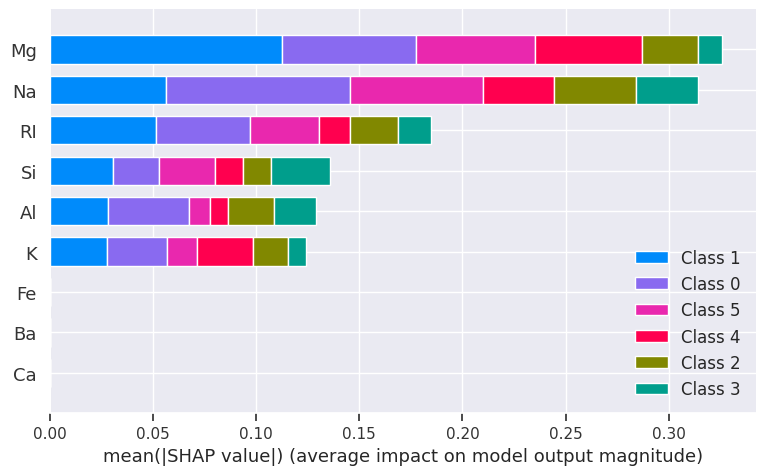

In [ ]:
explainer = shap.TreeExplainer(tuned_et_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

# Random Forest Classifier Model

In [ ]:
rf_pca = create_model('rf')

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4667,0.0000,0.4667,0.4730,0.4550,0.2308,0.2393
1,0.7333,0.0000,0.7333,0.6635,0.6766,0.6154,0.6381
2,0.7333,0.0000,0.7333,0.8222,0.7624,0.6364,0.6483
3,0.8000,0.9110,0.8000,0.7889,0.7832,0.7321,0.7410
4,0.8000,0.9857,0.8000,0.7556,0.7733,0.7305,0.7395
5,0.7333,0.8869,0.7333,0.6972,0.6797,0.6319,0.6669
6,0.6667,0.8724,0.6667,0.5270,0.5844,0.5283,0.5439
7,0.6667,0.8987,0.6667,0.5460,0.5980,0.5253,0.5451
8,0.5333,0.8757,0.5333,0.5206,0.5067,0.3713,0.3830


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.4667  0.0000  0.4667  0.4730  0.4550  0.2308  0.2393
1       0.7333  0.0000  0.7333  0.6635  0.6766  0.6154  0.6381
2       0.7333  0.0000  0.7333  0.8222  0.7624  0.6364  0.6483
3       0.8000  0.9110  0.8000  0.7889  0.7832  0.7321  0.7410
4       0.8000  0.9857  0.8000  0.7556  0.7733  0.7305  0.7395
5       0.7333  0.8869  0.7333  0.6972  0.6797  0.6319  0.6669
6       0.6667  0.8724  0.6667  0.5270  0.5844  0.5283  0.5439
7       0.6667  0.8987  0.6667  0.5460  0.5980  0.5253  0.5451
8       0.5333  0.8757  0.5333  0.5206  0.5067  0.3713  0.3830
9       0.7143  0.0000  0.7143  0.6339  0.6557  0.5758  0.6069
Mean    0.6848  0.5430  0.6848  0.6428  0.6475  0.5578  0.5752
Std     0.1028  0.4444  0.1028  0.1167  0.1062  0.1481  0.1500


Tuning Random Forest Classifier Model

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.6533,0.6065,0.4512,0.4597
1,0.6000,0.0000,0.6000,0.4857,0.5273,0.4268,0.4486
2,0.6667,0.0000,0.6667,0.7417,0.6564,0.5399,0.5834
3,0.7333,0.8652,0.7333,0.7778,0.7258,0.6512,0.6707
4,0.6000,0.8182,0.6000,0.5683,0.5622,0.4611,0.4756
5,0.5333,0.7856,0.5333,0.4667,0.4929,0.3598,0.3644
6,0.5333,0.8148,0.5333,0.4944,0.4889,0.3750,0.3995
7,0.5333,0.8168,0.5333,0.5000,0.4974,0.3824,0.4015
8,0.6000,0.7948,0.6000,0.5889,0.5815,0.4767,0.4852


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6000  0.0000  0.6000  0.6533  0.6065  0.4512  0.4597
1       0.6000  0.0000  0.6000  0.4857  0.5273  0.4268  0.4486
2       0.6667  0.0000  0.6667  0.7417  0.6564  0.5399  0.5834
3       0.7333  0.8652  0.7333  0.7778  0.7258  0.6512  0.6707
4       0.6000  0.8182  0.6000  0.5683  0.5622  0.4611  0.4756
5       0.5333  0.7856  0.5333  0.4667  0.4929  0.3598  0.3644
6       0.5333  0.8148  0.5333  0.4944  0.4889  0.3750  0.3995
7       0.5333  0.8168  0.5333  0.5000  0.4974  0.3824  0.4015
8       0.6000  0.7948  0.6000  0.5889  0.5815  0.4767  0.4852
9       0.7143  0.0000  0.7143  0.6190  0.6623  0.5758  0.5864
Mean    0.6114  0.4895  0.6114  0.5896  0.5801  0.4700  0.4875
Std     0.0688  0.4002  0.0688  

Evaluating tuned random forest classifier model

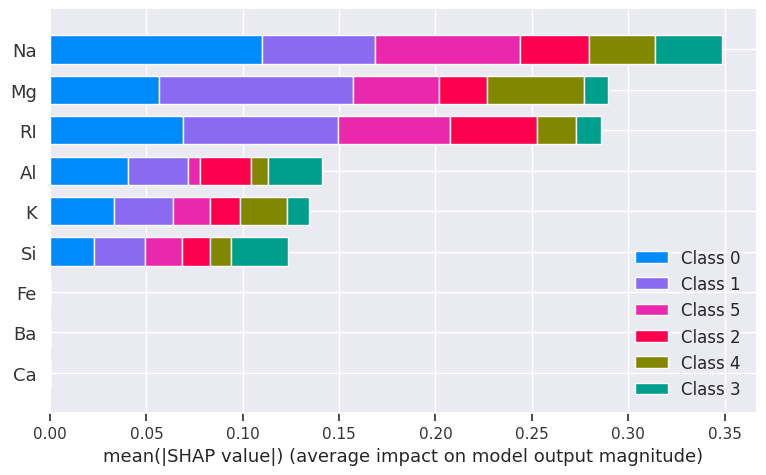

In [ ]:
explainer = shap.TreeExplainer(tuned_rf_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

#K-nearest neighbour(KNN) Model

Create K-nearest neighbour Model

In [ ]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.6852,0.5641,0.4611,0.5273
1,0.6000,0.0000,0.6000,0.6185,0.5597,0.4444,0.5009
2,0.8667,0.0000,0.8667,0.8778,0.8667,0.8125,0.8228
3,0.6000,0.8814,0.6000,0.6056,0.5889,0.4767,0.4852
4,0.8000,0.9324,0.8000,0.8083,0.7731,0.7256,0.7598
5,0.7333,0.9171,0.7333,0.6381,0.6630,0.6296,0.6558
6,0.6000,0.8171,0.6000,0.4778,0.5309,0.4340,0.4436
7,0.5333,0.8188,0.5333,0.4333,0.4747,0.3519,0.3615
8,0.6667,0.7952,0.6667,0.7000,0.6551,0.5427,0.5683


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune the KNN model

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.6200,0.5798,0.4375,0.4722
1,0.6000,0.0000,0.6000,0.5733,0.5515,0.4375,0.4722
2,0.8000,0.0000,0.8000,0.7417,0.7534,0.7020,0.7340
3,0.8000,0.8914,0.8000,0.7889,0.7832,0.7321,0.7410
4,0.8667,0.9600,0.8667,0.8381,0.8407,0.8171,0.8331
5,0.6667,0.9374,0.6667,0.5556,0.5980,0.5370,0.5517
6,0.6667,0.8395,0.6667,0.5270,0.5844,0.5283,0.5439
7,0.6667,0.8587,0.6667,0.5460,0.5980,0.5253,0.5451
8,0.6667,0.7919,0.6667,0.7000,0.6551,0.5427,0.5683


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

In [ ]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…